In [1]:
print("all okay")

all okay


In [1]:
from research_analyst.utils.model_loader import ModelLoader

d:\AGENT\PROJECT3\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
loader = ModelLoader()

{"timestamp": "2025-10-18T09:56:57.654243Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-18T09:56:57.656585Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-18T09:56:57.659317Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-18T09:56:57.660487Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-18T09:56:57.662060Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-18T09:56:57.663211Z", "level": "info", "event": "All required API keys are set."}
{"timestamp": "2025-10-18T09:56:57.664776Z", "level": "info", "event": "All required API keys are set."}


In [4]:
llm = loader.load_llm_model()

{"timestamp": "2025-10-18T09:57:10.137985Z", "level": "info", "event": "Loading LLM Model from provider: google"}
{"timestamp": "2025-10-18T09:57:10.179402Z", "level": "info", "event": "Successfully loaded LLM model: gemini-2.0-flash from provider: google"}


In [5]:
llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--6655ebf0-2cfb-4152-a0ff-59b0cd4a4c36-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})

In [6]:
from typing import List,Any,TypedDict,Optional
from pydantic import BaseModel,Field

In [7]:
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [14]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst")
    role: str = Field(description="Role of the analyst in the context of the project")
    affiliation: str= Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")

    @property
    def persona(self) -> str:
        return f"You are {self.name}, a {self.role} affiliated with {self.affiliation}.\n Main Focus of me is {self.description}"

In [15]:
analyst = Analyst(
    name="sunny savita",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [16]:
print(analyst.persona)


You are sunny savita, a genai eng affiliated with AI Research LAB.
 Main Focus of me is I am genai developer as well as mentor


In [17]:
class Prespective(BaseModel):
    analyst:List[Analyst] = Field(description="List of analysts involved in the project")

In [18]:
class GenerateAnalystState(TypedDict):
    topic: str
    num_analysts: int
    human_analyst_feedback: str
    analyst: List[Analyst]

In [19]:
analyst_picking_instructions = """
You are an expert research analyst tasked with selecting a team of analysts for a project on the topic of 
'{topic}'.
you need to choose {num_analysts} analysts from the available pool based on their expertise and relevance to the topic.
Consider the following feedback from a human analyst:
'{human_analyst_feedback}'
determine the theme and focus areas required for the project based on the topic and feedback.
Select analysts whose expertise aligns with these focus areas.
"""


In [ ]:
def create_analyst(state: GenerateAnalystState):
    topic = state['topic']
    num_analysts = state['num_analysts']
    human_analyst_feedback = state.get('human_analyst_feedback', '')
    prompt = analyst_picking_instructions.format(
        topic=topic,
        num_analysts=num_analysts,
        human_analyst_feedback=human_analyst_feedback
    )
    structured_llm=llm.with_structured_output(Prespective)

    content=["Generate the set of analysts."]
    messages = [HumanMessage(content=content)]
    final_messages = [SystemMessage(content=prompt)] + messages
    analyst=structured_llm.invoke(final_messages)

    return {"analyst": analyst.analyst}


In [25]:
state={
    "topic": "Artificial Intelligence in Healthcare",
    "num_analysts": 3,
    "human_analyst_feedback": "Focus on recent advancements and ethical considerations."
    }

In [26]:
create_analyst(state)

{'analyst': [Analyst(name='Dr. Emily Carter', role='AI Ethics Advisor', affiliation='University of Oxford', description='Specializes in the ethical implications of AI in healthcare, focusing on bias, privacy, and fairness.'),
  Analyst(name='Dr. Michael Lee', role='Data Scientist', affiliation='Google Health', description='Expert in machine learning and data analysis, with a focus on developing AI algorithms for medical diagnosis and treatment.'),
  Analyst(name='Dr. Sarah Chen', role='Healthcare Policy Analyst', affiliation='World Health Organization', description='Focuses on healthcare policy and regulation, with an interest in the impact of AI on healthcare systems.'),
  Analyst(name='Dr. David Rodriguez', role='Medical AI Researcher', affiliation='Stanford University', description='Conducts research on the application of AI in medical imaging and diagnostics.'),
  Analyst(name='Dr. Maria Garcia', role='AI Safety Engineer', affiliation='DeepMind', description='Works on ensuring the 

In [27]:
state={
    "topic": "Fiteness and Wellness Trends in 2024",
    "num_analysts": 3,
    "human_analyst_feedback": "Focus on emerging technologies and holistic approaches."
    }

In [28]:
create_analyst(state)

{'analyst': [Analyst(name='Dr. Anya Sharma', role='Lead Researcher', affiliation='Global Wellness Institute', description='Expert in holistic wellness practices and their impact on mental health. Focuses on mindfulness, meditation, and integrative medicine.'),
  Analyst(name='Ben Carter', role='Technology Analyst', affiliation='Tech Innovations Inc.', description='Specializes in wearable technology and AI-driven fitness solutions. Concerned with data privacy and user experience.'),
  Analyst(name='Emily Chen', role='Nutrition Specialist', affiliation='Food Science Institute', description='Focuses on personalized nutrition plans and the role of diet in athletic performance. Advocates for sustainable food practices.'),
  Analyst(name='Dr. Kenji Tanaka', role='Exercise Physiologist', affiliation='Sports Performance Lab', description='Expert in exercise science and biomechanics. Focuses on optimizing training programs for athletes and injury prevention.'),
  Analyst(name='Sophia Rodriguez'

Analyst for our research has been created

Now we will create an Workflow for the same

In [126]:
def human_feedback(state):
    """
    Node that should be interrupted by human to provide feedback on the selected analysts.
    """
    pass

In [157]:
def should_continue(state):
    """
    Node that decides whether to continue the analyst selection process based on human feedback.
    """
    feedback = state.get("human_analyst_feedback", "").strip().lower()
    if feedback in ["none","","continue","skip","done"]:
        return END
    return "Analyst"

In [158]:
from IPython.display import Image, display

First Workflow

In [159]:
builder=StateGraph(GenerateAnalystState)
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback",human_feedback)
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst","human_feedback")
builder.add_conditional_edges("human_feedback",
                             should_continue,
                             {
                               "Analyst": "create_analyst",
                               END: END
                             }
)

In [160]:
memory=MemorySaver()

In [161]:
graph=builder.compile(interrupt_before=["human_feedback"],checkpointer=memory)

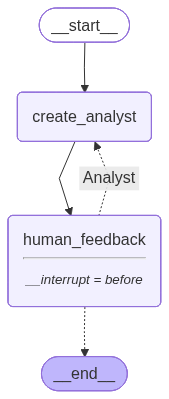

In [162]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [163]:
state={
    "topic": "Fiteness and Wellness Trends in 2024",
    "num_analysts": 3
    }

In [164]:
humman_feedback_input="Focus on emerging technologies and holistic approaches."

In [165]:
thread={"configurable":{"thread_id":"3"}}

In [166]:
for event in graph.stream(input=state,config=thread,stream_mode='values'):
    analysts=event.get("analyst",[])
    for analyst in analysts:
        print(f"Analyst Name: {analyst.name}")
        print(f"Role: {analyst.role}")
        print(f"Affiliation: {analyst.affiliation}")
        print(f"Description: {analyst.description}")
        print("*"*50)    

Analyst Name: Dr. Emily Carter
Role: Lead Researcher
Affiliation: Global Wellness Institute
Description: Expert in global wellness trends, consumer behavior, and market analysis. Focuses on identifying emerging trends and their potential impact on the wellness industry.
**************************************************
Analyst Name: Michael Davis
Role: Fitness Consultant
Affiliation: National Academy of Sports Medicine
Description: Certified personal trainer and fitness consultant with expertise in exercise science, program design, and behavior change. Focuses on translating research into practical fitness applications.
**************************************************
Analyst Name: Sophia Rodriguez
Role: Nutritionist
Affiliation: Academy of Nutrition and Dietetics
Description: Registered dietitian nutritionist with expertise in sports nutrition, weight management, and dietary trends. Focuses on providing evidence-based nutrition guidance for health and performance.
*****************

In [167]:
stage = graph.get_state(thread)

In [168]:
stage

StateSnapshot(values={'topic': 'Fiteness and Wellness Trends in 2024', 'num_analysts': 3, 'analyst': [Analyst(name='Dr. Emily Carter', role='Lead Researcher', affiliation='Global Wellness Institute', description='Expert in global wellness trends, consumer behavior, and market analysis. Focuses on identifying emerging trends and their potential impact on the wellness industry.'), Analyst(name='Michael Davis', role='Fitness Consultant', affiliation='National Academy of Sports Medicine', description='Certified personal trainer and fitness consultant with expertise in exercise science, program design, and behavior change. Focuses on translating research into practical fitness applications.'), Analyst(name='Sophia Rodriguez', role='Nutritionist', affiliation='Academy of Nutrition and Dietetics', description='Registered dietitian nutritionist with expertise in sports nutrition, weight management, and dietary trends. Focuses on providing evidence-based nutrition guidance for health and perfor

In [169]:
stage.next

('human_feedback',)

In [170]:
graph.update_state(
    thread,
    {
        "human_analyst_feedback": humman_feedback_input
    }
)

{'configurable': {'thread_id': '3',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ac179-26b9-6497-8002-bac3b8fd26bb'}}

In [171]:
for event in graph.stream(input=state,config=thread,stream_mode='values'):
    analysts=event.get("analyst",[])
    for analyst in analysts:
        print(f"Analyst Name: {analyst.name}")
        print(f"Role: {analyst.role}")
        print(f"Affiliation: {analyst.affiliation}")
        print(f"Description: {analyst.description}")
        print("*"*50)  

Analyst Name: Dr. Emily Carter
Role: Lead Researcher
Affiliation: Global Wellness Institute
Description: Expert in global wellness trends, consumer behavior, and market analysis. Focuses on identifying emerging trends and their potential impact on the wellness industry.
**************************************************
Analyst Name: Michael Davis
Role: Fitness Consultant
Affiliation: National Academy of Sports Medicine
Description: Certified personal trainer and fitness consultant with expertise in exercise science, program design, and behavior change. Focuses on translating research into practical fitness applications.
**************************************************
Analyst Name: Sophia Rodriguez
Role: Nutritionist
Affiliation: Academy of Nutrition and Dietetics
Description: Registered dietitian nutritionist with expertise in sports nutrition, weight management, and dietary trends. Focuses on providing evidence-based nutrition guidance for health and performance.
*****************

In [172]:
stage1= graph.get_state(thread)

In [173]:
stage1.next

('human_feedback',)

In [174]:
stage1.values

{'topic': 'Fiteness and Wellness Trends in 2024',
 'num_analysts': 3,
 'human_analyst_feedback': 'Focus on emerging technologies and holistic approaches.',
 'analyst': [Analyst(name='Dr. Anya Sharma', role='Lead Wellness Consultant', affiliation='Global Wellness Institute', description='Expert in holistic wellness practices, including mindfulness, nutrition, and integrative medicine. Focuses on personalized wellness plans and the impact of lifestyle on overall health.'),
  Analyst(name='Ben Carter', role='Fitness Technology Analyst', affiliation='Tech Innovations Inc.', description='Specializes in wearable fitness trackers, smart home gym equipment, and AI-driven fitness apps. Interested in the gamification of fitness and the use of data analytics to improve workout outcomes.'),
  Analyst(name='Carlos Rodriguez', role='Nutrition Science Researcher', affiliation='Food Science University', description='Conducts research on the impact of diet on physical performance and recovery. Focuses 

In [175]:
future_feedback=""

In [176]:
graph.update_state(
    thread,
    {
        "human_analyst_feedback": future_feedback
    }
)

{'configurable': {'thread_id': '3',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ac179-45e3-6dad-8006-468f008c355c'}}

In [177]:
for event in graph.stream(input=state,config=thread,stream_mode='values'):
    analysts=event.get("analyst",[])
    for analyst in analysts:
        print(f"Analyst Name: {analyst.name}")
        print(f"Role: {analyst.role}")
        print(f"Affiliation: {analyst.affiliation}")
        print(f"Description: {analyst.description}")
        print("*"*50)  

Analyst Name: Dr. Anya Sharma
Role: Lead Wellness Consultant
Affiliation: Global Wellness Institute
Description: Expert in holistic wellness practices, including mindfulness, nutrition, and integrative medicine. Focuses on personalized wellness plans and the impact of lifestyle on overall health.
**************************************************
Analyst Name: Ben Carter
Role: Fitness Technology Analyst
Affiliation: Tech Innovations Inc.
Description: Specializes in wearable fitness trackers, smart home gym equipment, and AI-driven fitness apps. Interested in the gamification of fitness and the use of data analytics to improve workout outcomes.
**************************************************
Analyst Name: Carlos Rodriguez
Role: Nutrition Science Researcher
Affiliation: Food Science University
Description: Conducts research on the impact of diet on physical performance and recovery. Focuses on sports nutrition, personalized diets, and the role of supplements in athletic training.
****

In [178]:
stage2= graph.get_state(thread)

In [179]:
stage2.next

('human_feedback',)

In [180]:
for event in graph.stream(input=None,config=thread,stream_mode='values'):
    analysts=event.get("analyst",[])
    for analyst in analysts:
        print(f"Analyst Name: {analyst.name}")
        print(f"Role: {analyst.role}")
        print(f"Affiliation: {analyst.affiliation}")
        print(f"Description: {analyst.description}")
        print("*"*50)  

Analyst Name: Dr. Emily Carter
Role: Lead Researcher
Affiliation: Global Wellness Institute
Description: Expert in global wellness trends, consumer behavior, and market analysis. Focuses on identifying emerging trends and their potential impact on the wellness industry.
**************************************************
Analyst Name: Michael Davis
Role: Fitness Consultant
Affiliation: National Academy of Sports Medicine
Description: Certified personal trainer and fitness consultant with expertise in exercise science, program design, and behavior change. Focuses on translating research into practical fitness applications.
**************************************************
Analyst Name: Sophia Rodriguez
Role: Nutritionist
Affiliation: Academy of Nutrition and Dietetics
Description: Registered dietitian nutritionist with expertise in sports nutrition, weight management, and dietary trends. Focuses on providing evidence-based nutrition guidance for health and performance.
*****************

In [181]:
stage3= graph.get_state(thread)

In [182]:
stage3.next

()

In [183]:
cfg = stage3.config

In [184]:
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '3',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ac179-6601-6f5b-800b-0ca82ac4a748'}}

In [185]:
final_state = graph.get_state(thread)

In [186]:
final_state.next

()

In [188]:
final_state.values.get('analyst')

[Analyst(name='Dr. Emily Carter', role='Lead Researcher', affiliation='Global Wellness Institute', description='Expert in global wellness trends, consumer behavior, and market analysis. Focuses on identifying emerging trends and their potential impact on the wellness industry.'),
 Analyst(name='Michael Davis', role='Fitness Consultant', affiliation='National Academy of Sports Medicine', description='Certified personal trainer and fitness consultant with expertise in exercise science, program design, and behavior change. Focuses on translating research into practical fitness applications.'),
 Analyst(name='Sophia Rodriguez', role='Nutritionist', affiliation='Academy of Nutrition and Dietetics', description='Registered dietitian nutritionist with expertise in sports nutrition, weight management, and dietary trends. Focuses on providing evidence-based nutrition guidance for health and performance.'),
 Analyst(name='David Lee', role='Technology Analyst', affiliation='TechWellness Group', d

First Flow completed